# Notebook oficial - TP Datos

In [1]:
# Importando librerias
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import warnings

In [2]:
#Carga del dataset
df_tweets = pd.read_csv('data/train.csv')
#Dimension
print('La dimension del dataset es: ',df_tweets.shape[0], 'registros,', df_tweets.shape[1],'columnas')
# Vista de los primeros registros
df_tweets.head(5)
# Data:
# id - identificador unico para cada tweet
# keyword - un keyword para el tweet (podría faltar)
# location - ubicación desde donde fue enviado (podría no estar)
# text - el texto del tweet
# target - indica si se trata de un desastre real (1) o no (0)

La dimension del dataset es:  7613 registros, 5 columnas


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
#Definición de tipos
df_tweets['id'] = df_tweets['id'].astype(int)
df_tweets['keyword'] = df_tweets['keyword'].astype('string')
df_tweets['location'] = df_tweets['location'].astype('string')
df_tweets['text'] = df_tweets['text'].astype('string')
df_tweets['target'] = df_tweets['target'].astype('bool')

In [4]:
#Elimino duplicados
df_tweets.drop_duplicates(inplace=True)

In [5]:
df_tweets.describe(include="all")

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613
unique,NaN,221,3341,7503,2
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,False
freq,NaN,45,104,10,4342
mean,5441.934848,NaN,NaN,NaN,NaN
std,3137.116090,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,2734.000000,NaN,NaN,NaN,NaN
50%,5408.000000,NaN,NaN,NaN,NaN
75%,8146.000000,NaN,NaN,NaN,NaN


In [6]:
print(df_tweets.info())
# Tenemos:
# -> 100% datos id, text y target
# -> 99,19% datos keyword
# -> 66,73% datos location

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int32 
 1   keyword   7552 non-null   string
 2   location  5080 non-null   string
 3   text      7613 non-null   string
 4   target    7613 non-null   bool  
dtypes: bool(1), int32(1), string(3)
memory usage: 275.1 KB
None


In [7]:
keywords = df_tweets['keyword']
print('Las key son',len(keywords.unique()), 'keywords:')
keywords.value_counts()

Las key son 222 keywords:


fatalities               45
armageddon               42
deluge                   42
sinking                  41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: Int64

In [8]:
location = df_tweets['location']
print('La locations son',len(location.unique()), 'locations:')
location.value_counts().head(10)

La locations son 3342 locations:


USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: Int64

In [9]:
# Análisis sobre las keywords más frecuentes para los eventos falsos y verdaderos

In [10]:
falseEvents = df_tweets[df_tweets['target'] < 1]
falseEventsKeys = falseEvents['keyword']
trueEvents = df_tweets[df_tweets['target'] == 1]
trueEventsKeys = trueEvents['keyword']
freqTrueKeys = trueEventsKeys.value_counts()
freqFalseKeys = falseEventsKeys.value_counts()

In [11]:
print('Las key falsas son',len(falseEventsKeys.unique()), 'keywords:')
freqFalseKeys

Las key falsas son 219 keywords:


body%20bags          40
harm                 37
armageddon           37
ruin                 36
wrecked              36
                     ..
typhoon               1
suicide%20bombing     1
oil%20spill           1
suicide%20bomber      1
outbreak              1
Name: keyword, Length: 218, dtype: Int64

In [12]:
print('Las key verdaderas son',len(trueEventsKeys.unique()), 'keywords:')
freqTrueKeys

Las key verdaderas son 221 keywords:


derailment     39
outbreak       39
wreckage       39
debris         37
oil%20spill    37
               ..
epicentre       1
body%20bag      1
electrocute     1
body%20bags     1
ruin            1
Name: keyword, Length: 220, dtype: Int64

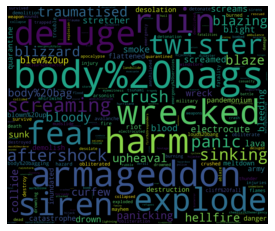

In [13]:
#Wordcloud de False keys en base a su ocurrencia
wordcloud = WordCloud(width=3000,height=2500, max_words= len(freqFalseKeys),relative_scaling=1,normalize_plurals=False).generate_from_frequencies(freqFalseKeys)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Wordcloud de True keys en base a su ocurrencia
wordcloud = WordCloud(width=3000,height=2500, max_words=len(freqTrueKeys),relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(freqTrueKeys)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Las columnas que nos interesan son text y target, las renombramos para que sea mas comodo y facil de medir  
tweets = df_tweets
tweets.head(10)

In [ ]:
#Conseguimos las keywords
ocurrenciasTotales = tweets["keyword"].dropna().value_counts().to_dict()

In [ ]:
ocurrenciasKeywordsVerdaderas = freqTrueKeys.to_dict()

In [ ]:
ocurrenciasKeywordsFalsas = freqFalseKeys.to_dict()

In [ ]:
#Creo un diccionario con las keywords y una tupla que contiene los valores de las ocurrencias verdaderas y las falsas 
# asi no perdemos el orden de la keyword con sus ocurrencias
mergeDict = {}
for key in ocurrenciasTotales:
    mergeDict[key] = (ocurrenciasKeywordsVerdaderas[key] if key in ocurrenciasKeywordsVerdaderas else 0, \
                     ocurrenciasKeywordsFalsas[key] if key in ocurrenciasKeywordsFalsas else 0)


In [ ]:
##Pasamos el dict a keys para los graficos
ocurrenciasTrue = []
ocurrenciasFalse = []

for key in mergeDict:
    ocurrenciasTrue.append(mergeDict[key][0])
    ocurrenciasFalse.append(mergeDict[key][1])

keys = list(mergeDict.keys())

In [ ]:
#Ploteamos el pyramid barchart
labels = keys
valuesTrue = np.array(ocurrenciasTrue)
valuesFalse = np.array(ocurrenciasFalse)
                               
idx = valuesTrue.argsort()
labels, valuesTrue, valuesFalse = [np.take(x, idx) for x in [labels, valuesTrue, valuesFalse]]

y = np.arange(valuesFalse.size)

fig, axes = plt.subplots(ncols=2, sharey=True)

fig.set_size_inches(16, 40, forward=True)

axes[0].barh(y, valuesTrue, align='center', color='green', zorder=10)
axes[0].set(title='Cantidad de tweets verdaderos por keyword')
axes[1].barh(y, valuesFalse, align='center', color='red', zorder=10)
axes[1].set(title='Cantidad de tweets falsos por keyword')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=labels)
axes[0].yaxis.tick_right()


for ax in axes.flat:
    ax.margins(0.005)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
plt.show()

In [ ]:
#Agarramos el top 5
keysTrueTop ={}
contador = 0
for key in ocurrenciasKeywordsVerdaderas:
    if contador in range(5):
        keysTrueTop[key] = (mergeDict[key][0],mergeDict[key][1])
    contador+=1
        
labels = list(keysTrueTop.keys())

valuesTrue = []
for key in keysTrueTop:
    valuesTrue.append(keysTrueTop[key][0])


valuesFalse = []
for key in keysTrueTop:
    valuesFalse.append(keysTrueTop[key][1])

In [ ]:
#Este es el top 5 de la lista de keywords
df = pd.DataFrame({'Tweets verdaderos': valuesTrue,'Tweets falsos': valuesFalse}, index=labels)
ax = df.plot.barh()
ax.set_title("Top 5 de keywords con mas tweets verdaderos", fontsize=18) 

In [ ]:
#Agarramos el bot 5
keysTrueBot ={}
contador = 0
for key in ocurrenciasKeywordsVerdaderas:
    if contador in range(216,220):
        keysTrueBot[key] = (mergeDict[key][0],mergeDict[key][1])
    contador+=1

##caso particular, no hay trues en aftershock
aftershock = "aftershock"
keysTrueBot[aftershock]= (mergeDict[aftershock][0],mergeDict[aftershock][1])
## 

labels = list(keysTrueBot.keys())
labels

valuesTrue = []
for key in keysTrueBot:
    valuesTrue.append(keysTrueBot[key][0])


valuesFalse = []
for key in keysTrueBot:
    valuesFalse.append(keysTrueBot[key][1])


In [ ]:
#Este es el bot five de la lista de keywords
df = pd.DataFrame({'Tweets Verdaderos': valuesTrue,'Tweets Falsos': valuesFalse}, index=labels)
ax = df.plot.barh()
ax.set_title("Top 5 de keywords con mas tweets falsos", fontsize=18) 

In [ ]:
tweetsConKeyword = tweets
tweetsConKeyword = tweetsConKeyword.drop(columns = ["target", "location","id"]).dropna()

In [ ]:
tweetsConKeyword["keyword"] = tweetsConKeyword["keyword"].str.replace("%20"," ")
ocurrenciasTotales = tweetsConKeyword["keyword"].dropna().value_counts().to_dict()

In [ ]:
ocurrenciasTotales = tweetsConKeyword["keyword"].dropna().value_counts().to_dict()

for key in ocurrenciasTotales:
    tweetDeKeyword = tweetsConKeyword.loc[tweetsConKeyword["keyword"] == key]
    ocurrenciasTotales[key] = tweetDeKeyword["text"].str.contains(key).value_counts().to_dict()


In [ ]:
keywordsMayorTrue = {}
keywordsMayorFalse = {}
keywordsEqualTrueFalse = {}

for key in ocurrenciasTotales:
    cantidadTrue = 0
    cantidadFalse = 0
    for key2 in ocurrenciasTotales[key]:
        if key2 is True:
            cantidadTrue = (ocurrenciasTotales[key][key2])
        else:
            cantidadFalse = (ocurrenciasTotales[key][key2])
    if cantidadTrue > cantidadFalse:
        keywordsMayorTrue[key] = ("Mayoria True" ,cantidadTrue)
    elif cantidadTrue < cantidadFalse:
        keywordsMayorFalse[key]= ("Mayoria False",cantidadFalse)
    else:
        keywordsEqualTrueFalse[key]= ("Cantidad True y False" ,cantidadTrue,cantidadFalse)
        
keywordMatchTrue = len(keywordsMayorTrue.keys())
keywordMatchFalse = len(keywordsMayorFalse.keys())
keywordMatchEqual = len(keywordsEqualTrueFalse.keys())
print(keywordMatchTrue,keywordMatchFalse,keywordMatchEqual)

In [ ]:
print(tweetsConKeyword.count())
tweetsConKeyword

In [ ]:
tweetsConKeywordSinDuplicados = tweetsConKeyword
tweetDeKeyword = tweetsConKeywordSinDuplicados.drop_duplicates(inplace=True)
print(tweetsConKeywordSinDuplicados.count())


In [ ]:
ocurrenciasTotalesSinDuplicados = tweetsConKeywordSinDuplicados["keyword"].dropna().value_counts().to_dict()

for key in ocurrenciasTotalesSinDuplicados:
    tweetDeKeyword = tweetsConKeywordSinDuplicados.loc[tweetsConKeywordSinDuplicados["keyword"] == key]
    ocurrenciasTotalesSinDuplicados[key] = tweetDeKeyword["text"].str.contains(key).value_counts().to_dict()


In [ ]:
tweetsSandstorm = tweetsConKeywordSinDuplicados.loc[tweetsConKeywordSinDuplicados["keyword"] == "sandstorm"]
tweetsSandstorm

 ### aca empezamos a analizar en base a location

In [ ]:
tweets_with_location = df_tweets.loc[df_tweets['location'].notnull()]
tweets_with_location.count()

dato curioso: todos los tweets con location tienen keyword tambien

In [ ]:
#casteo target de bool a int para poder sumarlo
tweets_with_location['target'] = tweets_with_location['target'].astype(int)

In [ ]:
#agrupo los tweets por location
grouped_by_location = tweets_with_location.groupby(['location']).agg({'location':['count'], 'target':['sum'] })
grouped_by_location.sort_values(('location', 'count'), ascending = False).head(10)

In [ ]:
#creo una nueva columna que contiene la cantidad tweets falsos para cada location
grouped_by_location[('target', 'false_tweets')] = grouped_by_location[('location', 'count')] - grouped_by_location[('target', 'sum')]
grouped_by_location.sort_values(('target', 'false_tweets'), ascending = False).head()

 CANTIDAD TOTAL DE LOCATIONS = 3342

In [ ]:
#busco las locations que solo tienen tweets Falsos. Muestro el top 5
only_false_tweets = grouped_by_location.loc[grouped_by_location[('location','count')] == grouped_by_location[('target', 'false_tweets')]]
only_false_tweets.sort_values(('location', 'count'), ascending = False).head(5)

In [ ]:
#cuento cuantas locations SOLO tienen tweets falsos
only_false_tweets.count()

In [ ]:
#calculo el porcentaje de locations que solo tiene tweets falsos
pct_only_false = 1828/3342*100
pct_only_false

54,69% de las locations usadas solo contienen tweets falsos

In [ ]:
#busco las locations que solo tienen tweets verdaderos. Muestro el top 5
only_true_tweets = grouped_by_location.loc[grouped_by_location[('location','count')] == grouped_by_location[('target', 'sum')]]
only_true_tweets.sort_values(('location', 'count'), ascending = False).head()

In [ ]:
# cuento cantidad de locations con tweets SOLO verdaderos
only_true_tweets.count()

In [ ]:
pct_only_true = 1199/3342*100
pct_only_true

35.87% de todas las locations contienen tweets que solamente son verdaderos

In [ ]:
#calculo porcentaje de locations que tienen tanto tweets verdaderos como falsos
100 -pct_only_true - pct_only_false

Solo 9,4% de las locations tienen tweets tantos verdaderos como falsos

podemos hacer un pie chart de estos porcentajes

In [ ]:
labels = [r'Solo contienen tweets Falsos (1828)', r'Solo contienen tweets Verdaderos (1199)', 
r'contienen tweets verdaderos y falsos (315)']
sizes = [54.7, 35.9, 9.4]

patches, texts, _ = plt.pie(sizes, autopct = '%1.1f%%', startangle=90)
plt.legend(patches, labels, loc="best")


plt.title('Porcentaje de Locations segun la veracidad de todos sus tweets')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Para las locations mas populares, cuales son las keywords mas usadas? habra alguna relacion entre ellas?

In [ ]:
# creo una lista con las 10 locations mas usadas
most_used_locations = grouped_by_location.nlargest(10, ('location','count')).index.values.tolist()
most_used_locations

In [ ]:
# filtro los tweets en un nuevo dataframe
df_tweets_for_most_used_location = tweets_with_location.loc[tweets_with_location['location'].isin(most_used_locations)]
df_tweets_for_most_used_location.count()

In [ ]:
df_tweets_for_most_used_location['keyword'].value_counts()

de 426 tweets correspondientes a las 10 locations mas usadas, solo hay 164 keywords distintas

In [ ]:
# hago un groupby de keywords y me fijo cuantos de los tweets que tienen cada keyword son TRUE
grouped_keywords_from_locations = df_tweets_for_most_used_location.groupby(['keyword']).agg({'keyword':['count'], 'target': ['sum']})
grouped_keywords_from_locations.sort_values(('keyword', 'count'), ascending = False).head(10)

In [ ]:
df_tweets_for_most_used_location.loc[df_tweets_for_most_used_location['target'] == False].count()

de un total de 426 tweets, hay 202 falsos

In [ ]:
#obtengo las 10 keywords mas usadas
most_used_keywords = grouped_keywords_from_locations.nlargest(10, ('keyword','count'))
most_used_keywords

In [ ]:
#convierto las 10 keywords mas usadas a una lista
most_used_keywords_list = most_used_keywords.index.values.tolist()
most_used_keywords_list

In [ ]:
#para el df que tiene los tweets de las 10 locations mas mencionadas, me quedo con los tweets que tienen como keyword, alguna del top 10
most_used_loc_and_keys = df_tweets_for_most_used_location.loc[df_tweets_for_most_used_location['keyword']\
                                                              .isin(most_used_keywords_list)]
most_used_loc_and_keys

In [ ]:
#solo me interesan las keywords y locations
reduced_df = most_used_loc_and_keys[['keyword', 'location']]

#agrego una nueva columna con 1, la idea es usarla como contador para los proximos pasos
reduced_df['value'] = 1
reduced_df

In [ ]:
#agrupo por keywords Y locations, y aplico 'sum' a la columna value
keywords_per_locations = reduced_df.groupby(['keyword','location']).agg({'value':['sum']})
keywords_per_locations

me queda: para cada keyword: las locations correspondientes a sus tweets, y cuantos fueron enviados desde dichas locations

In [ ]:
# hago operacion de pivot para luego poder graficar: las nuevas columnas van a ser las locations.
pivot = keywords_per_locations.pivot_table(index='keyword', columns='location', values= 'value', aggfunc = np.sum)

# Relleno los NaN con 0, ya que si el valor es NaN, es porque para esa keyword,
# no hay ningun tweet que haya sido enviado desde la location correspondiente
pivot = pivot.fillna(0)
pivot

In [ ]:
# para que me quede lindo en el grafico tengo que eliminar el nivel 'sum'
# que engloba als columnas
column_rename = pivot.columns.tolist()
garbo, columns_list = zip(*column_rename)
columns_list

In [ ]:
# reemplazo las columnas con las nuevas
pivot.columns = columns_list
pivot

In [ ]:
visu = sns.heatmap(pivot, cmap = 'viridis', vmin=0)

visu.set_title("distribucion de keywords mas usadas en base a Locations mas ocurrentes")
visu.set_ylabel("keywords mas usadas para las Locations")
visu.set_xlabel("Locations con mayor cantidad de tweets")

visu.set_xticklabels(visu.get_xticklabels(), rotation=75)

##### analisis en base a la longitud de los tweets

In [ ]:
#Calculo len de los tweets
len_tw = df_tweets['text'].str.len()

In [ ]:
#Creo un dataframe con las 2 columnas que utilizo
tw_slice = pd.DataFrame({'keyword':keywords,'len_txt':len_tw})
tw_slice = tw_slice.dropna()
tw_slice

In [ ]:
#Calculo promedio del largo de tweets
len_tw_mean = tw_slice['len_txt'].mean()
len_tw_mean

In [ ]:
#Propongo una cota maxima: (len del tweet maximo + promedio len) /2
len_tw_max = tw_slice['len_txt'].max()
cout_max = (len_tw_max + len_tw_mean)/2
cout_max

In [ ]:
#Propongo una cota minima: (len del tweet maximo + promedio len) /2
len_tw_min = tw_slice['len_txt'].min()
cout_min = (len_tw_min + len_tw_mean)/2
cout_min

In [ ]:
#Me quedo con los registros cuya longitud superan la cota maxima
len_plus_avg = tw_slice.loc[tw_slice['len_txt'] > cout_max]
len_plus_avg['keyword'].value_counts()

In [ ]:
#Me quedo con los registros cuya longitud superan el promedio de len
len_plus_avg = tw_slice.loc[tw_slice['len_txt'] >= len_tw_mean]
len_plus_avg['keyword'].value_counts()

In [ ]:
#Me quedo con los registros cuya longitud  no superan el promedio de len
len_plus_avg = tw_slice.loc[tw_slice['len_txt'] < len_tw_mean]
len_plus_avg['keyword'].value_counts()

In [ ]:
#me quedo con los registros que el len del text no superan la cota minima
len_plus_avg = tw_slice.loc[tw_slice['len_txt'] < cout_min]
len_plus_avg['keyword'].value_counts()

In [ ]:
#Calculo el promedio del largo de los tweets verdaderos sin keyword ni location
tw_loc_key_null = df_tweets.loc[df_tweets['location'].isnull() & df_tweets['keyword'].isnull()]
true_loc_key_null = tw_loc_key_null.loc[tw_loc_key_null['target'] == True]
len_true_key_loc_null = true_loc_key_null['text'].str.len()
len_true_key_loc_null.mean()

In [ ]:
#Calculo el promedio del largo de los tweets falsos sin keyword ni location
false_loc_null = tw_loc_key_null.loc[tw_loc_key_null['target'] == False]
len_tw_key_loc_null = false_loc_null['text'].str.len()
len_tw_key_loc_null.mean()

In [ ]:
#Creo un nuevo dataframe con target y len para tweets sin location ni keywords
tw_slice_target_len = pd.DataFrame()
tw_slice_target_len['len_txt'] = tw_loc_key_null['text'].str.len().astype('float')
tw_slice_target_len['target'] = tw_loc_key_null['target']
tw_slice_target_len

In [ ]:
#Boxplot para cantidad de caracteres de tweets sin keyword ni location
plt.figure(figsize=(10,8), dpi= 80)
violin = sns.boxplot(x='target', y='len_txt', data=tw_slice_target_len)
plt.title('Distribución de cantidad de caracteres para tweets sin keyword ni location', fontsize=22)
violin.set_xlabel('Tweets')
violin.set_ylabel('Cantidad de caracteres')
plt.show()